In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


## Data Info

In [2]:
df = pd.read_csv('data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [5]:
df_gozlem = df.select_dtypes(include=["float64","int64"])
df_gozlem.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


## Data Visualization

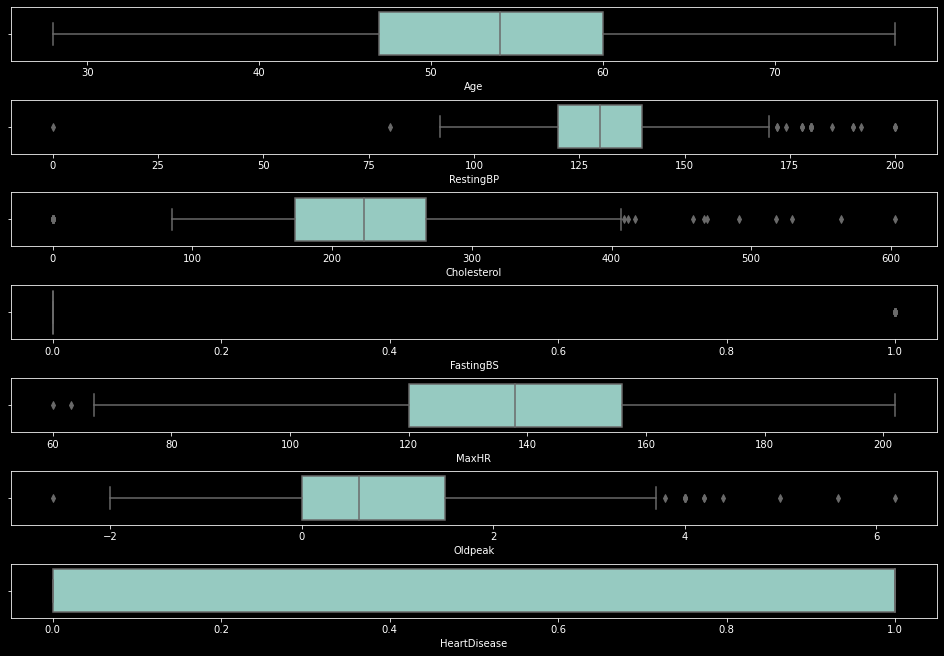

In [6]:
f, axes = plt.subplots(len(df_gozlem.columns), 1, constrained_layout = True, figsize=([13,9]))

for i in range(len(df_gozlem.columns)):
    
    sns.boxplot(x=df_gozlem[df_gozlem.columns[i]], ax=axes[i])

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

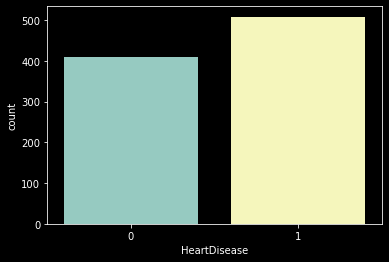

In [7]:
sns.countplot(x=df["HeartDisease"])

## Data Preprocessing

In [8]:
df['Sex'] = np.where(df['Sex'] == "F", 0, 1)
df['ExerciseAngina'] = np.where(df['ExerciseAngina'] == "N", 0, 1)

In [9]:
df = pd.get_dummies(df)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


## Train-Test Split

In [10]:
y = df["HeartDisease"]
X = df.drop(["HeartDisease"], axis =1)

X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=42)

## Decision Tree

In [11]:
dTree = DecisionTreeClassifier().fit(X_train,y_train)

In [12]:
y_pred_dt = dTree.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred_dt))

0.4662524041201569

### Model Evaluation

In [13]:
print('Training set score: {:.4f}'.format(dTree.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dTree.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7826


In [14]:
print(classification_report(y_pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77       118
           1       0.73      0.87      0.80       112

    accuracy                           0.78       230
   macro avg       0.79      0.78      0.78       230
weighted avg       0.79      0.78      0.78       230



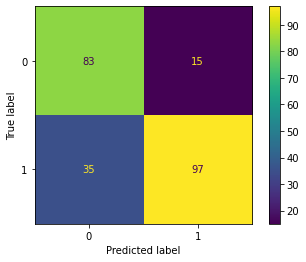

In [15]:
plot_confusion_matrix(dTree, X_test, y_test)

## Random Forest

In [16]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [17]:
y_pred_rf = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_rf))

0.3362193900727166

### Model Evaluation

In [18]:
print('Training set score: {:.4f}'.format(rf_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf_model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8870


In [19]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       102
           1       0.89      0.91      0.90       128

    accuracy                           0.89       230
   macro avg       0.89      0.88      0.89       230
weighted avg       0.89      0.89      0.89       230



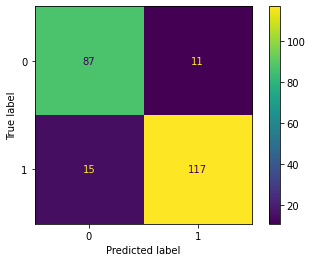

In [20]:
plot_confusion_matrix(rf_model, X_test, y_test)

## Random Forest Model Tuning

In [21]:
rf_params = {"max_depth": [5,8,10], 
"max_features": [2,5,10],
"n_estimators": [200,500,1000],
"min_samples_split": [2,10,80]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=5, n_jobs = -1, verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min


[CV] max_depth=5, max_features=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=2, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=2, min_samples_split=2, n_estimators=500, total=   1.3s
[CV] max_depth=5, max_features=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=2, min_samples_split=2, n_estimators=1000, total=   2.6s
[CV] max_depth=5, max_features=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, max_features=2, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=2, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, max_features=2, min_samples_split=10, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_featur

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.4min



[CV]  max_depth=8, max_features=5, min_samples_split=10, n_estimators=500, total=   1.4s
[CV] max_depth=8, max_features=5, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=8, max_features=5, min_samples_split=10, n_estimators=1000, total=   2.9s
[CV] max_depth=8, max_features=5, min_samples_split=80, n_estimators=200 
[CV]  max_depth=8, max_features=5, min_samples_split=80, n_estimators=200, total=   0.5s
[CV] max_depth=8, max_features=5, min_samples_split=80, n_estimators=200 
[CV]  max_depth=8, max_features=5, min_samples_split=80, n_estimators=200, total=   0.5s
[CV] max_depth=8, max_features=5, min_samples_split=80, n_estimators=200 
[CV]  max_depth=8, max_features=5, min_samples_split=80, n_estimators=200, total=   0.5s
[CV] max_depth=8, max_features=5, min_samples_split=80, n_estimators=500 
[CV]  max_depth=8, max_features=5, min_samples_split=80, n_estimators=500, total=   1.3s
[CV] max_depth=8, max_features=5, min_samples_split=80, n_estimators=1000 
[CV]  max_depth=8,

[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.8min finished


In [22]:
rf_cv_model.best_params_

{'max_depth': 5,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [23]:
rf_tuned_model = RandomForestClassifier(max_depth= 8,max_features= 2,min_samples_split= 2,n_estimators= 1000).fit(X_train,y_train)

In [24]:
y_pred_tuned = rf_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred_tuned))

0.3362193900727166

### Model Evaluation

In [25]:
print('Training set score: {:.4f}'.format(rf_tuned_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf_tuned_model.score(X_test, y_test)))

Training set score: 0.9549
Test set score: 0.8870


In [26]:
print(classification_report(y_pred_tuned,y_test))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       102
           1       0.89      0.91      0.90       128

    accuracy                           0.89       230
   macro avg       0.89      0.88      0.89       230
weighted avg       0.89      0.89      0.89       230



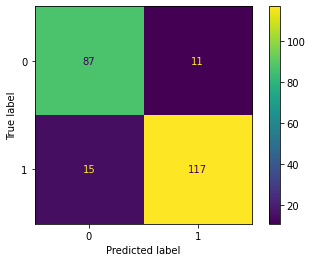

In [27]:
plot_confusion_matrix(rf_tuned_model, X_test, y_test)